# Poland Car Sales Price Prediction

Poland Car Sales Price Prediction is a model that will be used to predict the selling price of a car in Poland based on available information. These data include year data, mileage, and vol_engine.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Capstone Project

/content/gdrive/MyDrive/Capstone Project


## Import Libraries

Libraries that have been used in this analysis include:


*   pandas and numpy for preprocessing data
*   matplotlib and seaborn for creating visualizations
*   sklearn to develop models

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


## Dataset



The dataset was assembled in January 2022. Data from a well-known car sale site in Poland (which is public).
The dataset contains information about the mark, model, generation, year of production, mileage, engine type and volume, fuel, localization and price.
Data set consists of 11 columns and 117926 rows of data


In [4]:
df = pd.read_csv("Car_Prices_Poland_Kaggle.csv")

In [5]:
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [6]:
print(df.isna().any())

Unnamed: 0         False
mark               False
model              False
generation_name     True
year               False
mileage            False
vol_engine         False
fuel               False
city               False
province           False
price              False
dtype: bool


In [7]:
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [8]:
df.drop(columns=["generation_name","Unnamed: 0"],inplace=True)

In [9]:
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        117927 non-null  object
 1   model       117927 non-null  object
 2   year        117927 non-null  int64 
 3   mileage     117927 non-null  int64 
 4   vol_engine  117927 non-null  int64 
 5   fuel        117927 non-null  object
 6   city        117927 non-null  object
 7   province    117927 non-null  object
 8   price       117927 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.1+ MB


In [11]:
df.describe()

,year,mileage,vol_engine,price
count,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,5.690135,9.236936e+04,643.613438,8.482458e+04
min,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


## Exploratory Data Analysis


EDA is used to understand the data better. How the distribution of data variables, the relationship between data variables, and others.

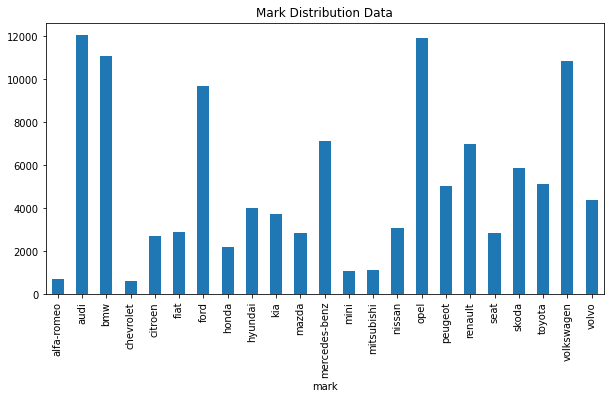

In [12]:
df.groupby('mark').size().plot(kind='bar', figsize=(10,5))
plt.title('Mark Distribution Data')
plt.ylabel('')

plt.show()


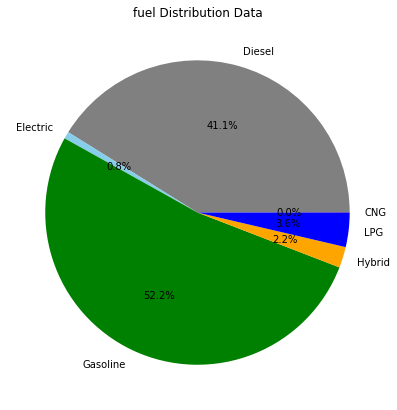

In [13]:
df.groupby('fuel').size().plot(kind='pie',autopct='%1.1f%%',colors = ['darkred', 'grey', 'skyblue', 'green', 'orange', 'blue'], figsize=(7,7))
plt.title('fuel Distribution Data')
plt.ylabel('')
plt.show()

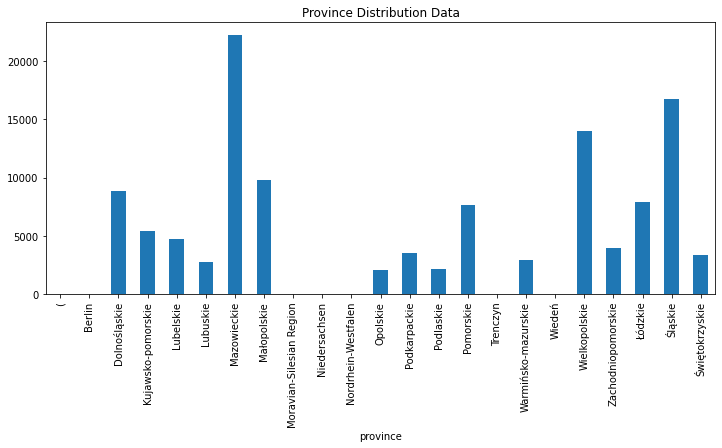

In [15]:
df.groupby('province').size().plot(kind='bar', figsize=(12,5))
plt.title('Province Distribution Data')
plt.ylabel('')
plt.show()

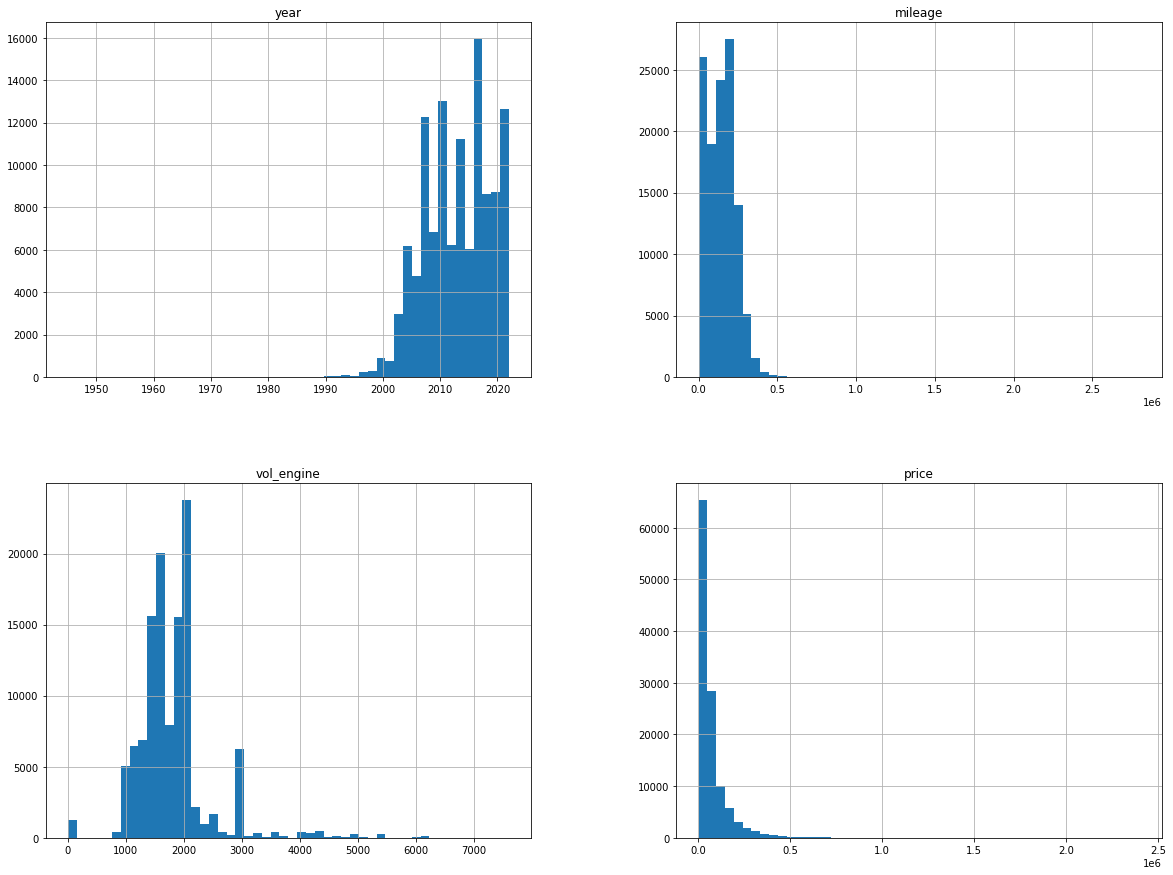

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

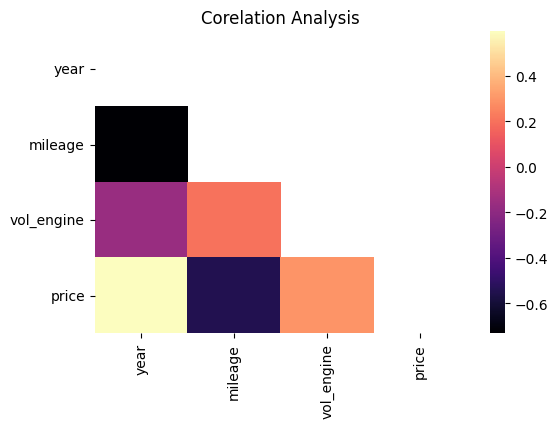

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Corelation Analysis')
sns.heatmap(corr, mask=mask, annot=False, lw=0, 
            linecolor='white', cmap='magma', fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

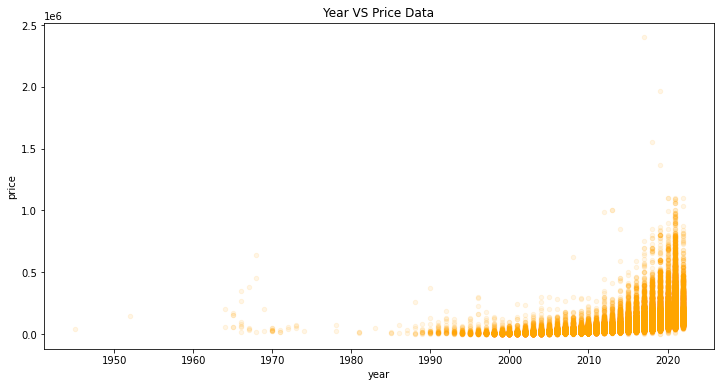

In [18]:
df.plot(kind="scatter", x="year", y="price",
             alpha=0.1, color = 'orange', figsize = (12,6))
plt.title('Year VS Price Data')
plt.show()

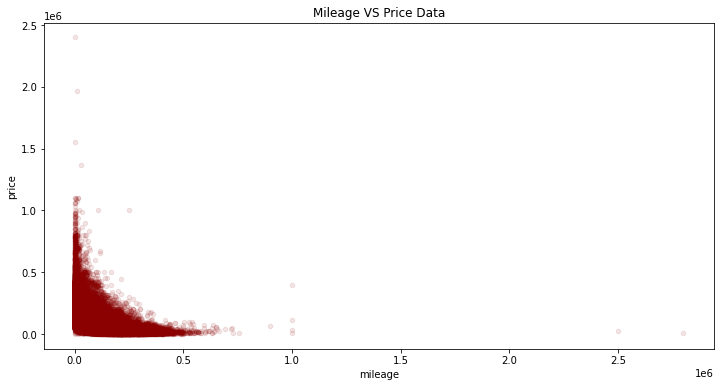

In [19]:
df.plot(kind="scatter", x="mileage", y="price",
             alpha=0.1, color = 'darkred', figsize = (12,6))
plt.title('Mileage VS Price Data')
plt.show()

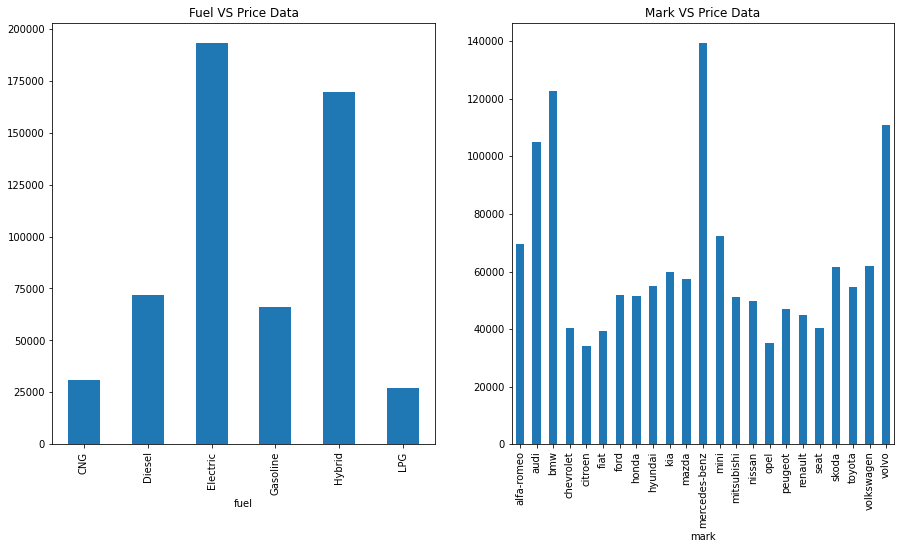

In [20]:
figure = plt.figure()
figure.subplots_adjust(bottom=0.025, left=0.025, top=1.975, right= 1.975)

plt.subplot(1, 2, 1)
df.groupby("fuel")["price"].mean().plot(kind='bar', figsize=(6,3))
plt.title('Fuel VS Price Data')

plt.subplot(1, 2, 2)
df.groupby("mark")["price"].mean().plot(kind='bar', figsize=(6,3))
plt.title('Mark VS Price Data')

plt.show()

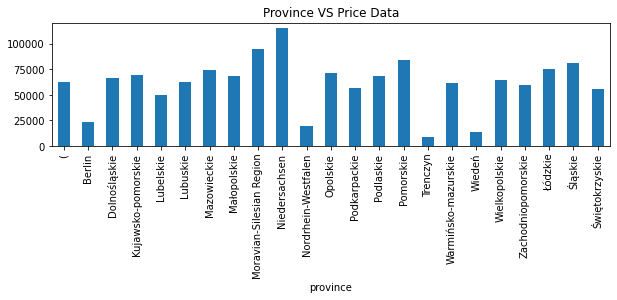

In [21]:
plt.subplot(2, 1, 1)
df.groupby("province")["price"].mean().plot(kind='bar', figsize=(10,5))
plt.title('Province VS Price Data')

plt.show()

## Data Preparation


Data preparation is used to check, and to process the data become all variables on the data is ready to be used to make models.

In [22]:
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [23]:
X = df.drop(['mark','model', 'fuel', 'city', 'province', 'price'], axis='columns')
Y = df['price']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(94341, 3)
(94341,)
(23586, 3)
(23586,)


In [25]:
X_train.head()

,year,mileage,vol_engine
105965,2006,128000,1360
95917,2011,130000,1591
42125,2008,202500,1200
101362,2009,159000,1397
22961,2018,96000,2995


In [26]:
Y_train.head()

105965     11500
95917      49900
42125      13900
101362     18999
22961     230000
Name: price, dtype: int64

## Modelling

There are 2 models that will be used:


*   Linear Regression
*   KNeighborsRegressor



In [27]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y_pred = LR.predict(X_test)
print('m :', LR.coef_)
print('b :', LR.intercept_)
print('loss:', mean_squared_error(Y_test, Y_pred))


m : [ 6.53415200e+03 -2.84858570e-01  5.71965096e+01]
b : -13145931.890590116
loss: 3250511072.228124


In [28]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

mse_train = mean_squared_error(Y_train, pred_train)
mse_test = mean_squared_error(Y_test, pred_test)

print('mse train =', mse_train)
print('mse_test =', mse_test)

mse train = 1208439797.8900688
mse_test = 1873920815.4087155


In [29]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [30]:
LR = LinearRegression()
LR.fit(scaled_X_train, Y_train)

Y_pred = LR.predict(scaled_X_test)
print('m :', LR.coef_)
print('b :', LR.intercept_)
print('loss:', mean_squared_error(Y_test, Y_pred))

m : [ 37252.60461068 -26396.61366641  36745.03240558]
b : 70324.17771700583
loss: 3250511072.2281246


In [31]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(scaled_X_train, Y_train)

pred_train = knn.predict(scaled_X_train)
pred_test = knn.predict(scaled_X_test)

mse_train = mean_squared_error(Y_train, pred_train)
mse_test = mean_squared_error(Y_test, pred_test)

print('mse train =', mse_train)
print('mse_test =', mse_test)


mse train = 769809557.7915785
mse_test = 1156006734.2335045


In [32]:
models = [LR, knn]

In [33]:
for model in models:
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    print(str(model), " : ", score)

LinearRegression()  :  0.5592117891706292
KNeighborsRegressor()  :  0.7458854361342862


## Conclussion & Future Works

Based on the 2 models used, it is found that the KNN model is more optimal when compared to the linear regression model to predict car prices in Poland.

For future projects, other models such as SVC, Decission Tree, and Random forest can be used to predict car price in Poland.

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)

pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

print(
    "Performance on training set:",
    classification_report(Y_train, pred_train),
    sep="\n"
)
print(
    "Performance on test set:",
    classification_report(Y_test, pred_test),
    sep="\n"
)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

print(
    "Performance on training set",
    classification_report(Y_train, pred_train),
    sep="\n"
)
print(
    "Performance on test set",
    classification_report(Y_test, pred_test),
    sep="\n"
)

In [ ]:
clf = RandomForestClassifier
clf.fit(X_train, Y_train)

pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

print(
    "Performance on training set",
    classification_report(Y_train, pred_train),
    sep="\n"
)
print(
    "Performance on test set",
    classification_report(Y_test, pred_test),
    sep="\n"
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ca814d7-4cb7-4929-ac00-8cdd9c99c67a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>